In [248]:
"""
데이터 청년 캠퍼스(0707)
인공지능관련 프로젝트

데이터셋
https://www.kaggle.com/datasets/anshtanwar/youth-tobacco-survey

5조
메인 주제 : 효과적인 담배 예방 및 통제 프로그램을 개발 및 구현하고 진행 상황을 모니터링하는 데 사용할 수 있습니다.
- 간접 흡연, 도시 흡연율, 단배 노출로 인한 청소년 흡연 피해, 혹은 흡연 노출도
- 금연을 원하는 사람, 금연 시도, 금연 성공, 금연을 원하는 흡연자들의 정보를 통한 금연 프로젝트 여부
- 30일간 금연 메시지, 흡연 반대 메시지, 스포츠 박람회, 건강 경고 등을 본 학생들 %를 확인하고 어떤 마케팅이 가장 효과적이였는지 등
- 학교에서 얼마나 정부 지침을 따르는지, COTPA(인도 담배 국가법)을 학교에서 잘 알고, 학생들도 인지를 하고 있는지 확인과 만약 부족하다면 학교를 대상으로 교육 필요 여부 등

* 학교에서 얼마나 정부 지침을 따르는지, COTPA(인도 담배 국가법)을 학교에서 잘 알고, 학생들도 인지를 하고 있는지 확인과 만약 부족하다면 학교를 대상으로 교육 필요 여부
'학교장들이 COTPA를 알고 있음, 2003년(%)',
'2003년 COTPA 6조에 따라 위반 시 벌금을 징수할 수 있도록 주정부로부터 승인된 학교(%)',
'학교는 '담배 없는 학교' 지침(%)을 따릅니다.',
'담배 없는 학교' 게시판 표시 정책을 알고 있는 학교들(%)',
'지난 12개월 동안 수업시간에 담배 사용의 유해성에 대해 교육을 받은 학생들(%)'
** datafile의 5개 열을 사용


* 결과
각 지역별로 학교에서 얼마나 정부 지침, COTPA(인도 담배 국가법)을 학교에서 잘 인지하고 따르고 있는지, 학생들의 인지를 위해 수업시간에 관련 교육을 했는지를 시각화
각 지역에서는 위 데이터를 예상해 클러스터를 예측 어느 지역과 비슷한 수준인지 판단을 통해 교육 필요 여부를 판단 가능

"""

"\n데이터 청년 캠퍼스(0707)\n인공지능관련 프로젝트\n\n데이터셋\nhttps://www.kaggle.com/datasets/anshtanwar/youth-tobacco-survey\n\n5조\n메인 주제 : 효과적인 담배 예방 및 통제 프로그램을 개발 및 구현하고 진행 상황을 모니터링하는 데 사용할 수 있습니다.\n- 간접 흡연, 도시 흡연율, 단배 노출로 인한 청소년 흡연 피해, 혹은 흡연 노출도\n- 금연을 원하는 사람, 금연 시도, 금연 성공, 금연을 원하는 흡연자들의 정보를 통한 금연 프로젝트 여부\n- 30일간 금연 메시지, 흡연 반대 메시지, 스포츠 박람회, 건강 경고 등을 본 학생들 %를 확인하고 어떤 마케팅이 가장 효과적이였는지 등\n- 학교에서 얼마나 정부 지침을 따르는지, COTPA(인도 담배 국가법)을 학교에서 잘 알고, 학생들도 인지를 하고 있는지 확인과 만약 부족하다면 학교를 대상으로 교육 필요 여부 등\n\n* 학교에서 얼마나 정부 지침을 따르는지, COTPA(인도 담배 국가법)을 학교에서 잘 알고, 학생들도 인지를 하고 있는지 확인과 만약 부족하다면 학교를 대상으로 교육 필요 여부\n'학교장들이 COTPA를 알고 있음, 2003년(%)',\n'2003년 COTPA 6조에 따라 위반 시 벌금을 징수할 수 있도록 주정부로부터 승인된 학교(%)',\n'학교는 '담배 없는 학교' 지침(%)을 따릅니다.',\n'담배 없는 학교' 게시판 표시 정책을 알고 있는 학교들(%)',\n'지난 12개월 동안 수업시간에 담배 사용의 유해성에 대해 교육을 받은 학생들(%)'\n** datafile의 5개 열을 사용\n\n\n* 결과\n각 지역별로 학교에서 얼마나 정부 지침, COTPA(인도 담배 국가법)을 학교에서 잘 인지하고 따르고 있는지, 학생들의 인지를 위해 수업시간에 관련 교육을 했는지를 시각화\n각 지역에서는 위 데이터를 예상해 클러스터를 예측 어느 지역과 비슷한 수준인지 판단을 통해 교육 필요 여부를 판단 가능\n\n"

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [250]:
df=pd.read_csv('sample_data/datafile.csv')

df.head(9)

,State/UT,Area,Ever tobacco users (%),Current tobacco users (%),Ever tobacco smokers (%),Current tobacco smokers (%),Ever cigarette users (%),Current cigarette users (%),Ever bidi users (%),Current bidi users (%),...,Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%),Students who were taught in class about harmful effects of tobacco use during past 12 months (%),Students who thought it is difficult to quit once someone starts smoking tobacco (%),Students who thought other people’s tobacco smoking is harmful to them (%),Students who favoured ban on smoking inside enclosed public places (%),Students who favoured ban on smoking at outdoor public places (%),"School heads aware of COTPA, 2003 (%)","Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003 (%)",Schools followed ‘tobacco-free school’ guidelines (%),Schools aware of the policy for displaying ‘tobacco-free school’ board (%)
0,India,Total,18.1,8.5,11.0,7.3,4.6,2.6,4.1,2.1,...,17.5,37.8,26.0,70.6,58.1,60.5,85.4,38.2,82.1,82.5
1,India,Urban,13.5,5.5,8.1,4.5,4.1,2.3,3.7,1.9,...,16.3,34.1,30.1,73.3,64.8,67.4,86.9,36.4,82.4,83.0
2,India,Rural,19.5,9.4,11.8,8.1,4.7,2.6,4.3,2.2,...,17.8,38.9,24.8,69.8,56.1,58.6,84.6,39.2,81.9,82.2
3,Andaman and Nicobar Islands,Total,21.5,4.4,8.8,3.7,4.4,1.3,2.7,1.0,...,21.1,23.4,23.0,69.0,65.0,60.6,88.6,1.1,76.0,67.9
4,Andaman and Nicobar Islands,Urban,13.3,3.4,6.5,2.6,3.7,1.3,2.0,0.7,...,20.2,25.7,26.9,66.6,65.1,60.9,89.1,0.0,85.3,42.5
5,Andaman and Nicobar Islands,Rural,26.8,5.1,10.2,4.4,4.8,1.4,3.2,1.3,...,21.7,22.0,20.5,70.6,65.0,60.4,88.0,2.4,64.2,100.0
6,Andhra Pradesh,Total,7.3,2.6,4.4,1.8,2.6,1.1,2.3,0.8,...,9.1,22.9,30.6,72.9,50.2,50.8,48.5,9.1,51.5,36.4
7,Andhra Pradesh,Urban,4.5,0.7,2.0,0.7,1.2,0.4,1.2,0.3,...,10.6,18.4,34.8,78.2,64.1,62.4,58.3,8.3,50.0,41.7
8,Andhra Pradesh,Rural,8.8,3.5,5.6,2.4,3.4,1.4,2.9,1.0,...,8.3,25.3,28.5,70.1,42.9,44.7,42.9,9.5,52.4,33.3


In [251]:
df = df.set_index('State/UT')
df

,Area,Ever tobacco users (%),Current tobacco users (%),Ever tobacco smokers (%),Current tobacco smokers (%),Ever cigarette users (%),Current cigarette users (%),Ever bidi users (%),Current bidi users (%),Ever smokeless tobacco users (%),...,Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%),Students who were taught in class about harmful effects of tobacco use during past 12 months (%),Students who thought it is difficult to quit once someone starts smoking tobacco (%),Students who thought other people’s tobacco smoking is harmful to them (%),Students who favoured ban on smoking inside enclosed public places (%),Students who favoured ban on smoking at outdoor public places (%),"School heads aware of COTPA, 2003 (%)","Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003 (%)",Schools followed ‘tobacco-free school’ guidelines (%),Schools aware of the policy for displaying ‘tobacco-free school’ board (%)
State/UT,,,,,,,,,,,,,,,,,,,,,
India,Total,18.1,8.5,11.0,7.3,4.6,2.6,4.1,2.1,12.5,...,17.5,37.8,26.0,70.6,58.1,60.5,85.4,38.2,82.1,82.5
India,Urban,13.5,5.5,8.1,4.5,4.1,2.3,3.7,1.9,8.5,...,16.3,34.1,30.1,73.3,64.8,67.4,86.9,36.4,82.4,83.0
India,Rural,19.5,9.4,11.8,8.1,4.7,2.6,4.3,2.2,13.7,...,17.8,38.9,24.8,69.8,56.1,58.6,84.6,39.2,81.9,82.2
Andaman and Nicobar Islands,Total,21.5,4.4,8.8,3.7,4.4,1.3,2.7,1.0,17.2,...,21.1,23.4,23.0,69.0,65.0,60.6,88.6,1.1,76.0,67.9
Andaman and Nicobar Islands,Urban,13.3,3.4,6.5,2.6,3.7,1.3,2.0,0.7,9.0,...,20.2,25.7,26.9,66.6,65.1,60.9,89.1,0.0,85.3,42.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uttarakhand,Total,31.4,18.5,26.6,17.2,13.2,7.3,14.3,5.6,10.3,...,16.7,27.5,25.4,63.4,50.7,56.5,50.0,14.3,67.9,60.7
Uttarakhand,Urban,39.5,25.7,35.9,24.8,19.4,9.7,22.2,7.7,8.7,...,22.4,35.3,35.4,67.7,60.6,67.4,42.9,0.0,42.9,57.1
Uttarakhand,Rural,28.2,15.7,22.9,14.2,10.7,6.3,11.3,4.8,11.0,...,14.4,24.4,21.5,61.7,46.9,52.2,52.4,19.1,76.2,61.9


In [252]:
df = df[df['Area'] == 'Total']
# 'Area' 열을 삭제합니다.
df = df.drop('Area', axis=1)
df

,Ever tobacco users (%),Current tobacco users (%),Ever tobacco smokers (%),Current tobacco smokers (%),Ever cigarette users (%),Current cigarette users (%),Ever bidi users (%),Current bidi users (%),Ever smokeless tobacco users (%),Current smokeless tobacco users (%),...,Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%),Students who were taught in class about harmful effects of tobacco use during past 12 months (%),Students who thought it is difficult to quit once someone starts smoking tobacco (%),Students who thought other people’s tobacco smoking is harmful to them (%),Students who favoured ban on smoking inside enclosed public places (%),Students who favoured ban on smoking at outdoor public places (%),"School heads aware of COTPA, 2003 (%)","Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003 (%)",Schools followed ‘tobacco-free school’ guidelines (%),Schools aware of the policy for displaying ‘tobacco-free school’ board (%)
State/UT,,,,,,,,,,,,,,,,,,,,,
India,18.1,8.5,11.0,7.3,4.6,2.6,4.1,2.1,12.5,4.1,...,17.5,37.8,26.0,70.6,58.1,60.5,85.4,38.2,82.1,82.5
Andaman and Nicobar Islands,21.5,4.4,8.8,3.7,4.4,1.3,2.7,1.0,17.2,1.4,...,21.1,23.4,23.0,69.0,65.0,60.6,88.6,1.1,76.0,67.9
Andhra Pradesh,7.3,2.6,4.4,1.8,2.6,1.1,2.3,0.8,4.4,1.1,...,9.1,22.9,30.6,72.9,50.2,50.8,48.5,9.1,51.5,36.4
Arunachal Pradesh,63.1,57.9,59.2,53.5,47.9,45.9,48.8,45.9,41.7,40.7,...,19.0,20.9,15.6,47.1,67.6,69.6,63.6,50.0,50.0,63.6
Assam,16.2,11.9,12.3,10.5,5.3,4.3,3.4,2.9,9.1,5.4,...,15.5,40.0,18.3,74.2,53.7,52.6,81.3,31.3,90.6,84.4
Bihar,21.5,7.3,9.4,4.7,4.8,2.3,3.3,1.8,15.5,3.2,...,17.3,39.4,22.5,61.8,52.2,55.5,100.0,37.1,94.3,97.1
Chandigarh,10.3,3.0,6.9,2.5,1.1,0.6,3.2,0.6,5.0,1.2,...,13.5,37.7,35.5,76.2,71.4,70.4,100.0,42.9,95.2,100.0
Chhattisgarh,18.8,8.0,10.4,6.9,6.3,4.5,4.2,2.2,14.4,2.6,...,15.8,47.1,26.3,70.7,63.8,69.1,71.0,19.4,96.8,90.3
Dadra and Nagar Haweli,15.3,2.4,4.6,2.2,1.7,1.1,2.5,1.3,12.4,0.7,...,22.4,33.0,19.8,77.9,56.1,55.9,100.0,22.2,88.9,88.9


In [253]:
df.columns

Index(['Ever tobacco users (%)', 'Current tobacco users (%)',
       'Ever tobacco smokers (%)', 'Current tobacco smokers (%)',
       'Ever cigarette users (%)', 'Current cigarette users (%)',
       'Ever bidi users (%) ', 'Current bidi users (%)',
       'Ever smokeless tobacco users (%)',
       'Current smokeless tobacco users (%)',
       'Ever users of  paan masala together with tobacco (%)',
       'Never cigarette smokers susceptible to cigarette use in future (%)',
       'Median age of initiation of Cigarette (in years)',
       'Median age of initiation of Bidi (in years)',
       'Median age of initiation of smokeless tobacco (in years)',
       'Awareness about e-cigarette (%)', 'Ever e-cigarette use (%)',
       'Ever tobacco smokers who quit in last 12 months (%)',
       'Current tobacco smokers who tried to quit smoking in the past 12 months (%)',
       'Current tobacco smokers who wanted to quit smoking now   (%)',
       'Ever  smokeless tobacco users who quit  in 

In [254]:
filter_data = df[[
    'School heads aware of COTPA, 2003  (%)',
    'Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003  (%)',
    'Schools followed ‘tobacco-free school’ guidelines  (%)',
    'Schools aware of the policy for displaying ‘tobacco-free school’ board  (%)',

    'Students who were taught in class about harmful effects of tobacco use during past 12 months (%)'
]]

In [255]:
filter_data.head(5)

,"School heads aware of COTPA, 2003 (%)","Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003 (%)",Schools followed ‘tobacco-free school’ guidelines (%),Schools aware of the policy for displaying ‘tobacco-free school’ board (%),Students who were taught in class about harmful effects of tobacco use during past 12 months (%)
State/UT,,,,,
India,85.4,38.2,82.1,82.5,37.8
Andaman and Nicobar Islands,88.6,1.1,76.0,67.9,23.4
Andhra Pradesh,48.5,9.1,51.5,36.4,22.9
Arunachal Pradesh,63.6,50.0,50.0,63.6,20.9
Assam,81.3,31.3,90.6,84.4,40.0


In [256]:
'''
'주/UT',
'학교장들이 COTPA를 알고 있음, 2003년(%),'
'2003년 COTPA 6조에 따라 위반 시 벌금을 징수할 수 있도록 주정부로부터 승인된 학교(%)',
'학교는 '담배 없는 학교' 지침(%)을 따릅니다.',
'담배 없는 학교' 게시판 표시 정책을 알고 있는 학교들(%)',
'지난 12개월 동안 수업시간에 담배 사용의 유해성에 대해 교육을 받은 학생들(%)'
'''

"\n'주/UT',\n'학교장들이 COTPA를 알고 있음, 2003년(%),'\n'2003년 COTPA 6조에 따라 위반 시 벌금을 징수할 수 있도록 주정부로부터 승인된 학교(%)',\n'학교는 '담배 없는 학교' 지침(%)을 따릅니다.',\n'담배 없는 학교' 게시판 표시 정책을 알고 있는 학교들(%)',\n'지난 12개월 동안 수업시간에 담배 사용의 유해성에 대해 교육을 받은 학생들(%)'\n"

In [257]:
data_values_kmeans = filter_data[[
    'School heads aware of COTPA, 2003  (%)',
    'Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003  (%)',
    'Schools followed ‘tobacco-free school’ guidelines  (%)',
    'Schools aware of the policy for displaying ‘tobacco-free school’ board  (%)',

    'Students who were taught in class about harmful effects of tobacco use during past 12 months (%)'
]]
#kmeans에 사용에 필요한 피처들을 새로운 data_values_kmeans에 저장

In [258]:
from yellowbrick.cluster import KElbowVisualizer

In [259]:
filter_data

,"School heads aware of COTPA, 2003 (%)","Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003 (%)",Schools followed ‘tobacco-free school’ guidelines (%),Schools aware of the policy for displaying ‘tobacco-free school’ board (%),Students who were taught in class about harmful effects of tobacco use during past 12 months (%)
State/UT,,,,,
India,85.4,38.2,82.1,82.5,37.8
Andaman and Nicobar Islands,88.6,1.1,76.0,67.9,23.4
Andhra Pradesh,48.5,9.1,51.5,36.4,22.9
Arunachal Pradesh,63.6,50.0,50.0,63.6,20.9
Assam,81.3,31.3,90.6,84.4,40.0
Bihar,100.0,37.1,94.3,97.1,39.4
Chandigarh,100.0,42.9,95.2,100.0,37.7
Chhattisgarh,71.0,19.4,96.8,90.3,47.1
Dadra and Nagar Haweli,100.0,22.2,88.9,88.9,33.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

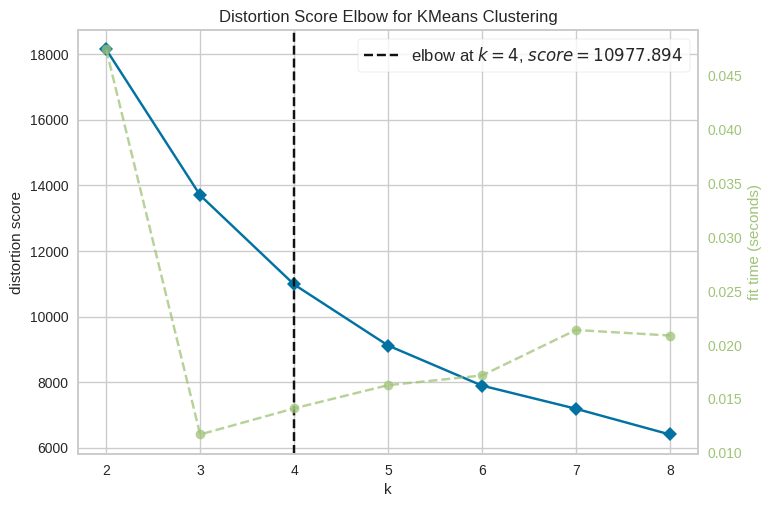

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [260]:
visualizer = KElbowVisualizer(KMeans(), k=(2, 9))
visualizer.fit(data_values_kmeans)
visualizer.show()
#k의 값을 구하기 위해 KElbowVisualizer함수 사용을 통해 적절한 k를 구함

In [261]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(data_values_kmeans)
#구한 k값을 통해서 kmeans모델을 생성하고 해당 모델에 data_values_kmeans를 적용

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [262]:
data_values_clusters = data_values_kmeans
data_values_clusters['Cluster'] = kmeans.labels_
#얻은 클러스터 값을 각 해당 하는 도시에 붙이고 도시와 분류된 클러스터를 출력하여 확인

data_values_clusters[['Cluster']]

,Cluster
State/UT,
India,0
Andaman and Nicobar Islands,0
Andhra Pradesh,1
Arunachal Pradesh,1
Assam,3
Bihar,3
Chandigarh,3
Chhattisgarh,3
Dadra and Nagar Haweli,3


In [263]:
'''
KElbowVisualizer
KElbowVisualizer는 KMeans 군집화 알고리즘에 대한 엘보우(elbow) 메서드를 시각화
군집화에서 적절한 군집 수(k)를 결정하기 위한 방법 중 하나
--> 각 지역에 대한 클러스터 값을 얻는다.
'''

'\nKElbowVisualizer\nKElbowVisualizer는 KMeans 군집화 알고리즘에 대한 엘보우(elbow) 메서드를 시각화\n군집화에서 적절한 군집 수(k)를 결정하기 위한 방법 중 하나\n--> 각 지역에 대한 클러스터 값을 얻는다.\n'

In [264]:
#PCA와 같은 차원 축소 기법은 고차원 데이터셋의 복잡성을 낮추고, 데이터를 보다 효율적으로 다룰 수 있게 해줍니다.

In [265]:
filter_data_pca = filter_data

#PCA 적용
from sklearn.preprocessing import StandardScaler

In [266]:
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(filter_data_pca), columns = filter_data_pca.columns)
#StandardScaler통해 데이터 정규화 진행

In [267]:
from sklearn.decomposition import PCA

In [268]:
pca = PCA(n_components=2)
#PCA를 사용하여 표준화된 데이터에 PCA를 적용, 두 개의 주 성분을 얻기 위해 2로 설정
pca_data = pca.fit_transform(df_scale)
#해당 PCA에 정규화한 데이터를 적용

In [269]:
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
#pca진행한 데이터의 칼럼 명을 PCA1. PCA2로 지정하여 데이터프레임으로 생성하여 새로운 변수에 저장
pca_df.index = filter_data.index

In [270]:
pca_df

,PCA1,PCA2
State/UT,,
India,-0.167740,-0.044938
Andaman and Nicobar Islands,1.729759,-1.648619
Andhra Pradesh,4.646486,-0.442803
Arunachal Pradesh,2.705565,1.794202
Assam,-0.346777,-0.676990
Bihar,-1.532339,-0.499368
Chandigarh,-1.683988,-0.171505
Chhattisgarh,-0.498656,-1.659085
Dadra and Nagar Haweli,-0.532392,-1.052059


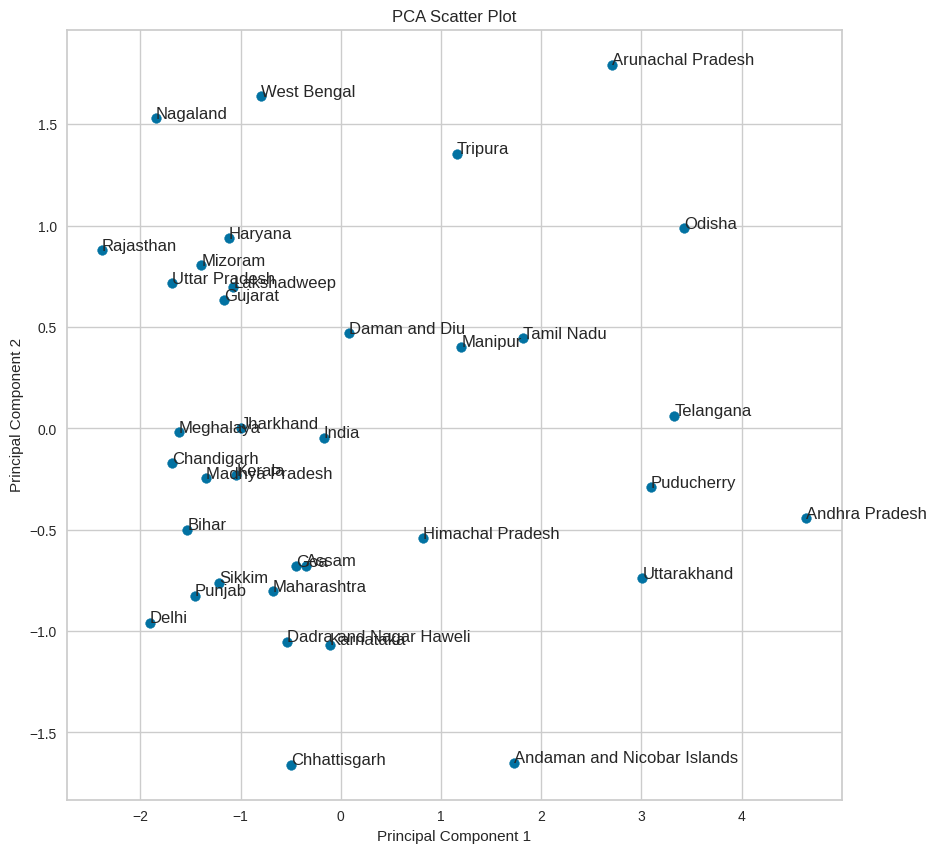

In [271]:
plt.figure(figsize=(10, 10))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')

for i, label in enumerate(pca_df.index):
    plt.annotate(label, (pca_df['PCA1'][i], pca_df['PCA2'][i]))

# Display the plot
plt.show()

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-273-14201b39a4e9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_values_kmeans['School heads aware of COTPA, 2003  (%)'], bins=20)


Text(0.5, 1.0, 'School heads aware of COTPA, 2003  (%)')

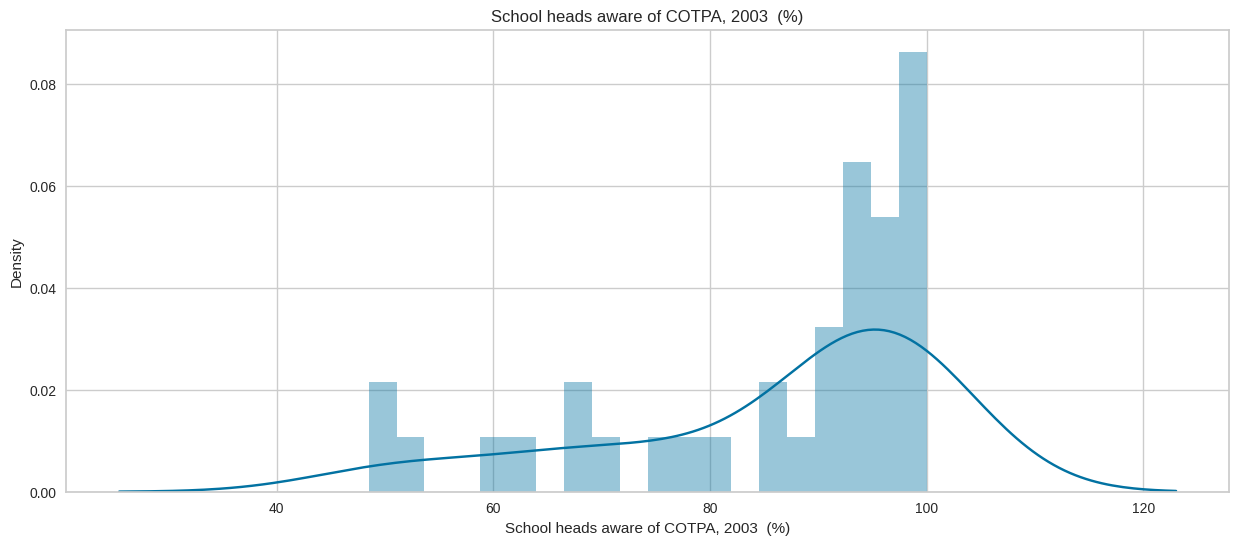

In [273]:
#피처로 사용한 각종 데이터를 시각적으로 확인하기 위해 각각에 데이터를 시각화

plt.figure(1, figsize = (15,6))
sns.distplot(data_values_kmeans['School heads aware of COTPA, 2003  (%)'], bins=20)
plt.title('School heads aware of COTPA, 2003  (%)')
#학교장들이 COTPA를 알고 있음, 2003년(%)

In [274]:
#학교장 80~100%가 COTPA(인도 담배 국가법)에 대해 알고 있는 지역이 많음.

<ipython-input-275-7026a514abd0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_values_kmeans['Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003  (%)'], bins=20)


Text(0.5, 1.0, 'Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003  (%)')

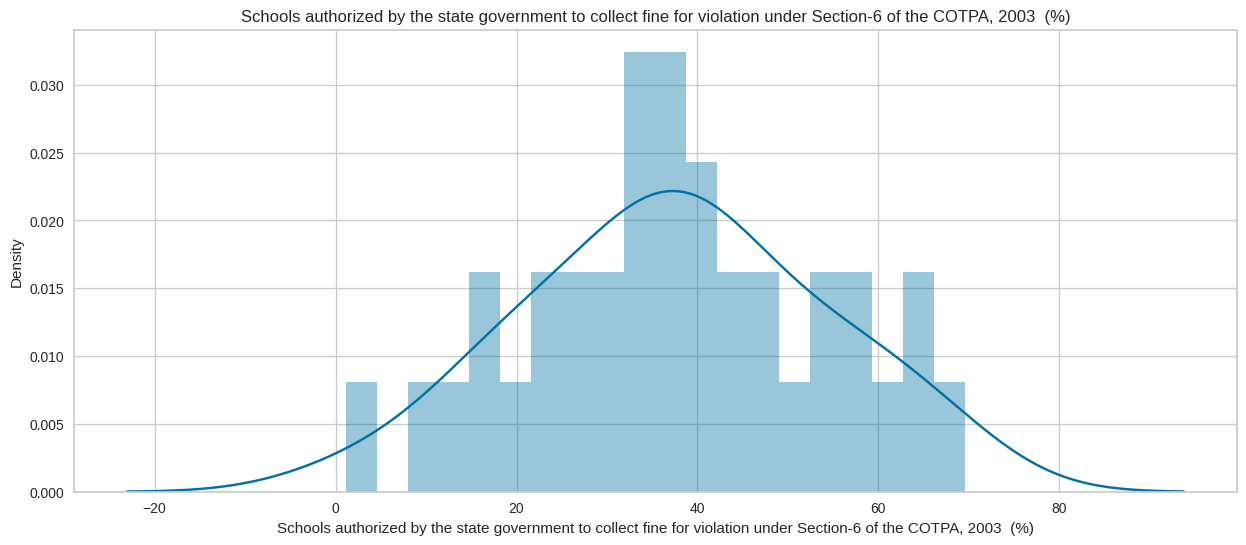

In [275]:
plt.figure(1, figsize = (15,6))
sns.distplot(data_values_kmeans['Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003  (%)'], bins=20)
plt.title('Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003  (%)')
#2003년 COTPA 6조에 따라 위반 시 벌금을 징수할 수 있도록 주정부로부터 승인된 학교(%)

In [276]:
#COTPA 6조에 따라 위반 시 벌금을 징수할 수 있도록 주정부로부터 승인된 학교는 지역별 30~50% 정도를 보임
#학교장들이 COTPA에 대해 아는 비율에 비해 COTPA 6조 위반 시 벌금을 징수할 수 있도록 주정부로부터 승인된 학교는 적음

<ipython-input-277-33647dbbdffd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_values_kmeans['Schools aware of the policy for displaying ‘tobacco-free school’ board  (%)'], bins=20)


Text(0.5, 1.0, 'Schools aware of the policy for displaying ‘tobacco-free school’ board  (%)')

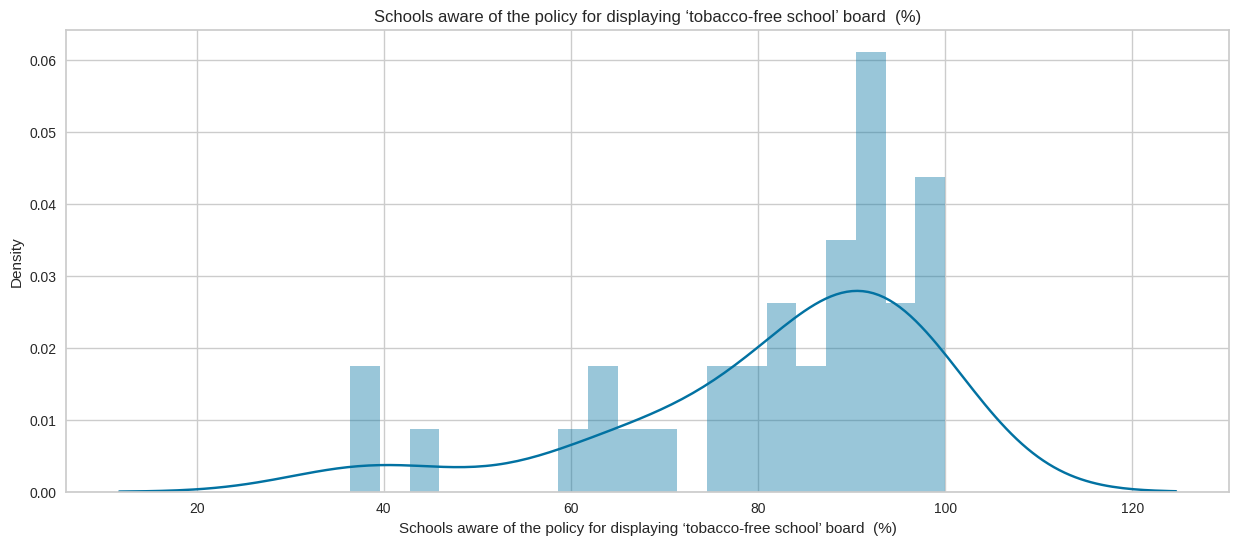

In [277]:
plt.figure(1, figsize = (15,6))
sns.distplot(data_values_kmeans['Schools aware of the policy for displaying ‘tobacco-free school’ board  (%)'], bins=20)
plt.title('Schools aware of the policy for displaying ‘tobacco-free school’ board  (%)')
#'담배 없는 학교' 게시판 표시 정책을 알고 있는 학교들(%)

In [278]:
#'담배 없는 학교' 게시판 표시 정책을 80~100%로 알고 있는 학교들의 지역이 상대적으로 많음

<ipython-input-279-378ebaf4b115>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_values_kmeans['Schools followed ‘tobacco-free school’ guidelines  (%)'], bins=20)


Text(0.5, 1.0, 'Schools followed ‘tobacco-free school’ guidelines  (%)')

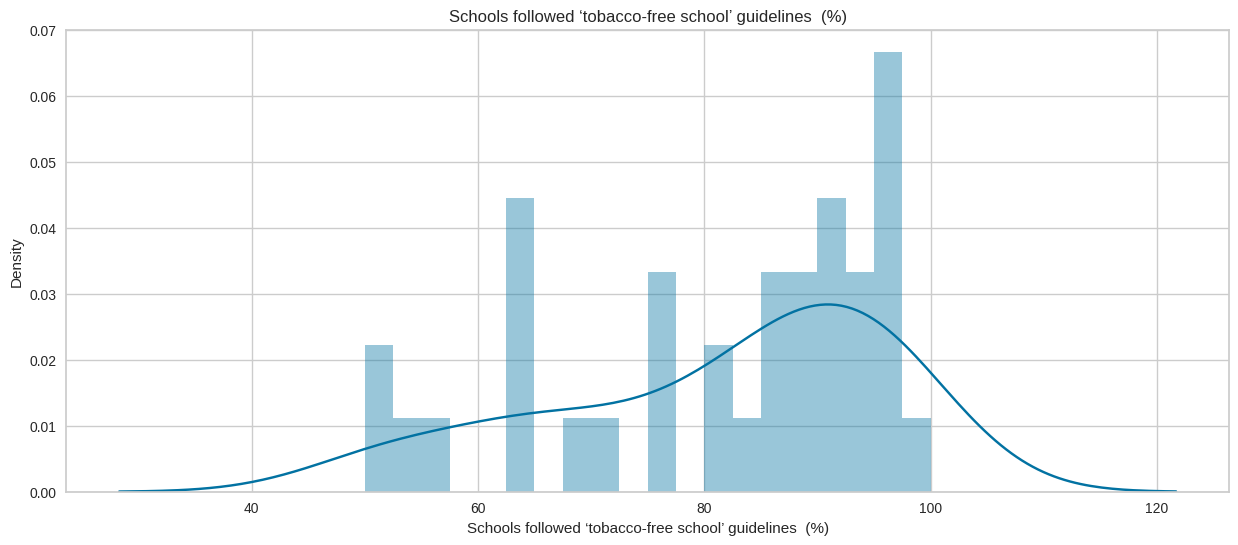

In [279]:
plt.figure(1, figsize = (15,6))
sns.distplot(data_values_kmeans['Schools followed ‘tobacco-free school’ guidelines  (%)'], bins=20)
plt.title('Schools followed ‘tobacco-free school’ guidelines  (%)')
#학교는 '담배 없는 학교' 지침(%)을 따릅니다.

In [280]:
#'담배 없는 학교' 지침을 80~100%의 학교가 따르는 지역이 많음

<ipython-input-281-e2b9c5154f93>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_values_kmeans['Students who were taught in class about harmful effects of tobacco use during past 12 months (%)'], bins=20)


Text(0.5, 1.0, 'Students who were taught in class about harmful effects of tobacco use during past 12 months (%)')

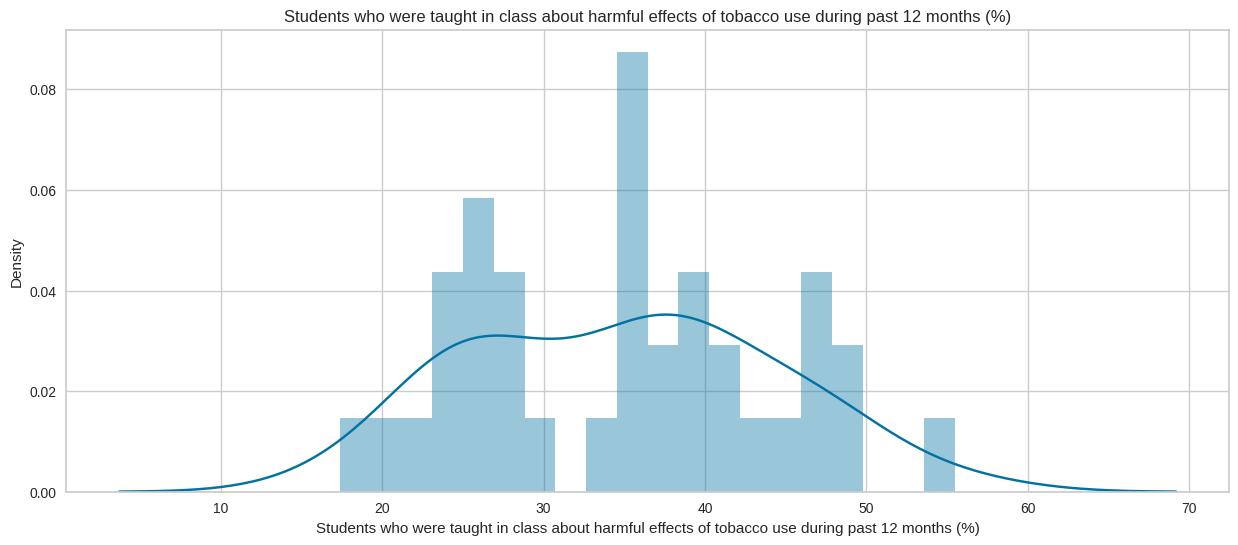

In [281]:
plt.figure(1, figsize = (15,6))
sns.distplot(data_values_kmeans['Students who were taught in class about harmful effects of tobacco use during past 12 months (%)'], bins=20)
plt.title('Students who were taught in class about harmful effects of tobacco use during past 12 months (%)')
#지난 12개월 동안 수업시간에 담배 사용의 유해성에 대해 교육을 받은 학생들(%)

In [282]:
#하지만 지역별로 20~30%, 35~50%의 학생들이 수업시간에 담배 사용의 유해성에 대해 교육을 받은 경우가 많음
#'담배 없는 학교' 지침 및 정책을 따르는 학교에 비해 수업시간에 담배 사용의 유해성에 대해 교육을 받은 경우가 적다.

In [283]:
#종합 결과
#학교에서는 COTPA(인도 담배 국가법)을 잘 알고, '담배 없는 학교' 지침과 정책을 잘 알고 따르고 있지만
#COTPA 6조 위반 시 벌금을 징수할 수 있도록 주정부로부터 승인된 학교가 적으며, 담배 사용의 유해성에 대해 교육을 받은 학생들이 상대적으로 적다.

In [284]:
from scipy.cluster.hierarchy import dendrogram, linkage
#피처들을 dendrogram을 이용하여 시각화하여 확인
plt.figure(figsize=(20,10))
cluster = linkage(data_values_kmeans, method='complete')
print(cluster.shape)

(35, 4)


<Figure size 2000x1000 with 0 Axes>

In [285]:
#Dendrogram, linkage은 계층적 군집화 알고리즘 병합군집(Agglomerative Clustering)에서 사용
#linkage를 사용하여 군집 간의 거리를 계산하고, 이를 Dendrogram으로 시각화하여 군집화 결과를 확인

Text(0, 0.5, 'Eunclidean distances')

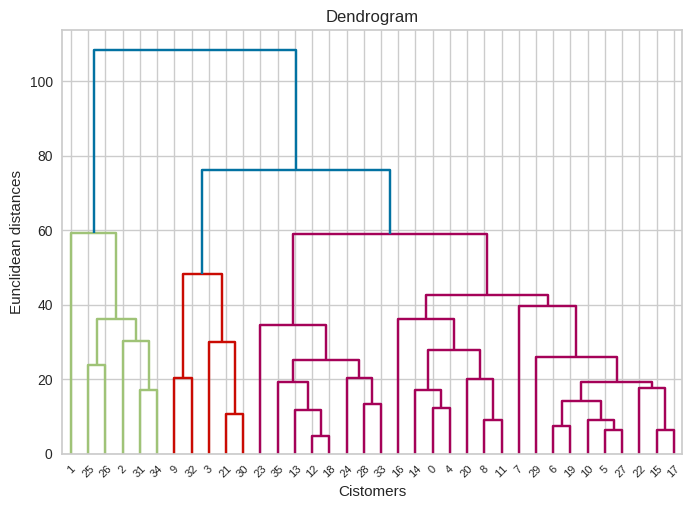

In [286]:
dendrogram = dendrogram(cluster)
plt.title('Dendrogram')
plt.xlabel('Cistomers')
plt.ylabel('Eunclidean distances')

In [287]:
data_values_clusters['Cluster']

State/UT
India                          0
Andaman and Nicobar Islands    0
Andhra Pradesh                 1
Arunachal Pradesh              1
Assam                          3
Bihar                          3
Chandigarh                     3
Chhattisgarh                   3
Dadra and Nagar Haweli         3
Daman and Diu                  0
Delhi                          3
Goa                            3
Gujarat                        2
Haryana                        2
Himachal Pradesh               0
Jharkhand                      3
Karnataka                      0
Kerala                         3
Lakshadweep                    2
Madhya Pradesh                 3
Maharashtra                    3
Manipur                        0
Meghalaya                      2
Mizoram                        2
Nagaland                       2
Odisha                         1
Puducherry                     1
Punjab                         3
Rajasthan                      2
Sikkim                         3
T

In [288]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [289]:
X = data_values_clusters[['School heads aware of COTPA, 2003  (%)',
    'Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003  (%)',
    'Schools followed ‘tobacco-free school’ guidelines  (%)',
    'Schools aware of the policy for displaying ‘tobacco-free school’ board  (%)',

    'Students who were taught in class about harmful effects of tobacco use during past 12 months (%)']]
y = data_values_clusters['Cluster']

In [290]:
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#학습 데이터와 테스트 데이터로 분할

In [291]:
LR = LogisticRegression(random_state=42)
DC = DecisionTreeClassifier(random_state=42, max_depth=8)
#Logistic Regression과 Decision Tree Classifier 각각 모델 생성

In [292]:
Voting = VotingClassifier( estimators=[('lr', LR), ('rf', DC)], voting='hard')
#Voting Classifier를 사용. 예측 결과를 투표 기반으로 결합하는 모델을 생성(다수결 투표 방식을 사용)

In [293]:
cross_val_score(LR, X, y, cv=5).mean()

0.9178571428571429

In [294]:
LR.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [295]:
feature_LR = LR.coef_[0]

In [296]:
feature_LR

array([ 0.27031831, -0.39858203, -0.44596993, -0.17495104, -0.64670658])

In [297]:
cross_val_score(DC,X,y, cv=5).mean()

0.8892857142857142

In [298]:
DC.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [299]:
feature_DC = DC.feature_importances_

In [300]:
for i, weight in enumerate(feature_DC):
    feature_name = f"Feature {i+1}"
    print(f"{feature_name}: {weight}")

Feature 1: 0.36511295396053767
Feature 2: 0.26369268897149933
Feature 3: 0.37119435706796294
Feature 4: 0.0
Feature 5: 0.0


In [301]:
cross_val_score(Voting, X, y, cv=5).mean()

0.9178571428571429

In [302]:
#Logistic Regression, Decision Tree Classifier, Voting Classifier의 성능을 평가하기 위해 교차 검증을 수행

#cross_val_score 함수를 사용하여 각 모델에 대한 교차 검증 정확도를 계산
#Logistic Regression과 Decision Tree Classifier - fit 메서드를 사용하여 각 모델을 학습
#Decision Tree Classifier 모델의 특성 중요도를 확인 - feature_importances_ 속성을 사용하여 각 특성에 대한 중요도 값을 얻음
#Voting Classifier 모델의 성능을 교차 검증을 통해 평가

In [303]:
data_values_clusters

new_data = [[52.3, 35.2, 25.2, 60.6, 52.8]]

new = DC.predict(new_data)

print("Predicted Cluster:", new[0])

Predicted Cluster: 2


In [304]:
#새로운 데이터에 대해 Decision Tree Classifier 모델을 사용하여 예측을 수행
#predict 메서드를 사용하여 새로운 데이터의 클러스터를 예측

In [305]:
"""

최종 결과
* 피처로 사용한 각종 데이터를 시각화 --> 각각 지역별 학교의 지침, 정책 수행 정도 분포를 시각화
- 학교에서는 COTPA(인도 담배 국가법)을 잘 알고, '담배 없는 학교' 지침과 정책을 잘 알고 따르고 있지만 COTPA 6조 위반 시 벌금을 징수할 수 있도록 주정부로부터 승인된 학교가 적으며, 담배 사용의 유해성에 대해 교육을 받은 학생들이 상대적으로 적다.

* 모델을 사용한 새로운 데이터 클러스터 예측
- 각 지역에서 학교의 지침, 정책 수행 정도의 새로운 데이터를 넣어 클러스터를 예측할 수 있다(어느 지역의 학교를 대상으로 교육이 필요한지 여부를 판단가능?)

"""

"\n\n최종 결과\n* 피처로 사용한 각종 데이터를 시각화 --> 각각 지역별 학교의 지침, 정책 수행 정도 분포를 시각화\n- 학교에서는 COTPA(인도 담배 국가법)을 잘 알고, '담배 없는 학교' 지침과 정책을 잘 알고 따르고 있지만 COTPA 6조 위반 시 벌금을 징수할 수 있도록 주정부로부터 승인된 학교가 적으며, 담배 사용의 유해성에 대해 교육을 받은 학생들이 상대적으로 적다.\n\n* 모델을 사용한 새로운 데이터 클러스터 예측\n- 각 지역에서 학교의 지침, 정책 수행 정도의 새로운 데이터를 넣어 클러스터를 예측할 수 있다(어느 지역의 학교를 대상으로 교육이 필요한지 여부를 판단가능?)\n\n"

In [306]:
'''

KElbowVisualizer
군집화에서 적절한 군집 수(k)를 결정하기 위한 방법 중 하나 --> 각 지역에 대한 클러스터 값을 얻음

PCA
다차원 데이터의 차원을 줄이는 비지도 학습 알고리즘

StandardScaler  //데이터 정규화 진행
주어진 데이터의 각 특성(feature)을 평균이 0이고 표준 편차가 1인 정규 분포를 따르도록 변환

Dendrogram, linkage
계층적 군집화 알고리즘 병합군집(Agglomerative Clustering)에서 사용
linkage를 사용하여 군집 간의 거리를 계산하고, 이를 Dendrogram으로 시각화하여 군집화 결과를 확인



Logistic Regression(로지스틱 회귀)
주형 종속 변수를 예측하는 데 사용되는 통계 기반 분류 알고리즘

Decision Tree Classifier(의사결정트리)
의사 결정 트리는 데이터를 분할하는 규칙을 학습하여 분류와 회귀 문제를 해결하는 데 사용되는 알고리즘

Voting Classifier(보팅 분류기)
앙상블 학습 기법 중 하나, 여러 개의 개별 분류기를 결합하여 예측 결과를 도출하는 모델
다양한 분류기들의 예측을 종합하여 최종 예측을 수행하므로, 개별 분류기보다 더 좋은 성능
**Hard Voting (단순 투표): 여러 개의 분류기가 예측한 클래스 레이블을 다수결로 결정

'''

'\n\nKElbowVisualizer\n군집화에서 적절한 군집 수(k)를 결정하기 위한 방법 중 하나 --> 각 지역에 대한 클러스터 값을 얻음\n\nPCA\n다차원 데이터의 차원을 줄이는 비지도 학습 알고리즘\n\nStandardScaler  //데이터 정규화 진행\n주어진 데이터의 각 특성(feature)을 평균이 0이고 표준 편차가 1인 정규 분포를 따르도록 변환\n\nDendrogram, linkage\n계층적 군집화 알고리즘 병합군집(Agglomerative Clustering)에서 사용\nlinkage를 사용하여 군집 간의 거리를 계산하고, 이를 Dendrogram으로 시각화하여 군집화 결과를 확인\n\n\n\nLogistic Regression(로지스틱 회귀)\n주형 종속 변수를 예측하는 데 사용되는 통계 기반 분류 알고리즘\n\nDecision Tree Classifier(의사결정트리)\n의사 결정 트리는 데이터를 분할하는 규칙을 학습하여 분류와 회귀 문제를 해결하는 데 사용되는 알고리즘\n\nVoting Classifier(보팅 분류기)\n앙상블 학습 기법 중 하나, 여러 개의 개별 분류기를 결합하여 예측 결과를 도출하는 모델\n다양한 분류기들의 예측을 종합하여 최종 예측을 수행하므로, 개별 분류기보다 더 좋은 성능\n**Hard Voting (단순 투표): 여러 개의 분류기가 예측한 클래스 레이블을 다수결로 결정\n\n'